# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data loading

In [2]:
df = pd.read_csv('mail_data.csv')   #reading the CSV file
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
data = df.where((pd.notnull(df)),'')    # Checking for the null values (Nan : Not a Number)
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.loc[data['Category'] == 'spam', 'Category', ] = 0
data.loc[data['Category'] == 'ham', 'Category', ] = 1
data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [5]:
X = data['Message']
Y = data['Category']

# Feature Extraction

In [6]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 3)

In [7]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [8]:
# Converting the text data into numerical features

feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# Logistic Regression model

In [9]:
model = LogisticRegression()    # Creating the instance of 'LogisticRegression'

In [10]:
model.fit(X_train_features, Y_train)    # Training the model

LogisticRegression()

# Predictions

In [11]:
prediction_on_test_data = model.predict(X_test_features)    # Making predictions on the test data using the trained model

In [12]:
prediction_on_test_data

array([0, 1, 1, ..., 1, 1, 1])

# Accuracy

In [13]:
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print("Accuracy:", accuracy_on_test_data)

Accuracy: 0.9668161434977578


# Confusion Matrix

Matplotlib is building the font cache; this may take a moment.


<Axes: >

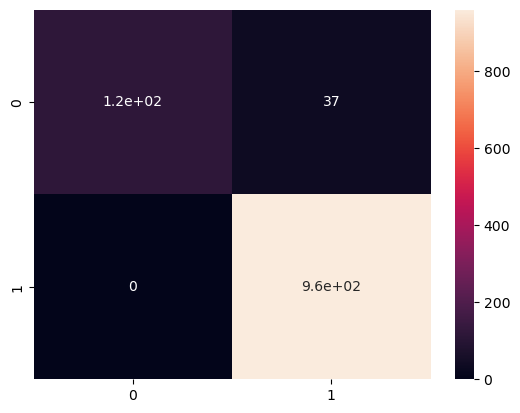

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction_on_test_data)

import seaborn as sns
sns.heatmap(cm, annot=True)

# Classification report

In [15]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test, prediction_on_test_data)
report = classification_report(Y_test, prediction_on_test_data)
print(f'Accuracy: {accuracy}')
print(f'\nClassification Report:\n{report}')

Accuracy: 0.9668161434977578

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



# Predicting some sample texts

In [16]:
# spam_text = "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize now: http://spamlink.com"
# ham_text = "Hi John, just wanted to check if you're available for the meeting tomorrow at 10 AM. Let me know if that works for you. Thanks!"

In [17]:
input_text = ['''Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize now: http://spamlink.com''']

input_data_features= feature_extraction.transform(input_text)

prediction = model.predict(input_data_features)

if(prediction[0] == 1):
    print('Ham')
else:
    print('Spam')

Spam


In [19]:
input_text = ['''Hi John, just wanted to check if you're available for the meeting tomorrow at 10 AM.
Let me know if that works for you. Thanks!''']

input_data_features= feature_extraction.transform(input_text)

prediction = model.predict(input_data_features)

if(prediction[0] == 1):
    print('Ham')
else:
    print('Spam')

Ham
